In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Boss Mundo 2

### Equipe Kung Fu Pandas: Gabriel Rodrigues, Karoline Ricachesk, Raul Rotilli, Vitor Ochoa e Wesley Fernandes.

## Análise Exploratória Avançada e Storytelling  com Visualizações:
Agora que seus dados do Boss 1 foram limpos e unificados, você realizará uma
análise profunda usando visualizações complexas e storytelling para guiar a
interpretação dos resultados.
Lembre-se, o objetivo é gerar insights e tomar decisões baseadas nas
visualizações e na exploração dos dados

In [4]:
df = pd.read_csv('pokedex_atualizada.csv')
df.head()

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,4,Charmander,1,Normal,Lizard Pokémon,1,Fire,Does not have,0.6,8.5,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
4,5,Charmeleon,1,Normal,Flame Pokémon,1,Fire,Does not have,1.1,19.0,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [5]:
df.describe()

,pokedex_number,generation,type_number,height_m,weight_kg,abilities_number,hp,attack,defense,sp_attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
count,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,...,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000
mean,426.957714,4.014857,1.500571,1.053486,47.423200,2.486857,66.083429,73.950857,69.628571,65.917714,...,1.084000,1.177429,0.992857,0.993714,1.256000,0.979429,0.966857,1.053143,0.979143,1.063429
std,260.252064,2.265250,0.500286,0.975147,75.801799,0.671927,24.163604,28.158608,28.003847,26.959671,...,0.782899,0.583690,0.493688,0.583150,0.695508,0.536569,0.339165,0.415522,0.489515,0.511990
min,1.000000,1.000000,1.000000,0.100000,0.100000,1.000000,1.000000,5.000000,5.000000,10.000000,...,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000
25%,197.500000,2.000000,1.000000,0.500000,8.000000,2.000000,50.000000,55.000000,50.000000,45.000000,...,0.500000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000
50%,423.000000,4.000000,2.000000,0.900000,24.000000,3.000000,65.000000,70.000000,65.000000,60.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,656.500000,6.000000,2.000000,1.400000,55.000000,3.000000,76.500000,92.000000,85.000000,85.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,887.000000,8.000000,2.000000,14.500000,920.000000,3.000000,255.000000,165.000000,230.000000,153.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,4.000000,4.000000


## Número de Pokémon por geração:
* Crie uma visualização que mostre o número de Pokémon
por geração, mas vá além de um gráfico simples de barras.
* Experimente combinar um gráfico de barras com uma linha que exiba a média de 'attack',
'defense' e 'speed' por geração. Utilize o Plotly para criar uma visualização interativa.
* Analise a distribuição de Pokémon ao longo das gerações. Há tendências ou mudanças
significativas na força dos Pokémon entre as gerações? Como isso pode estar relacionado à
história ou ao design do jogo em cada geração?

In [35]:
#pegando o numero de Pokémon e a média para ataque, defesa e velocidade pela geração
gen_counts = df['generation'].value_counts().sort_index()
gen_means = round(df.groupby('generation')[['attack', 'defense', 'speed']].mean(),2)
gen_means

,attack,defense,speed
generation,,,
1,73.20,68.06,68.47
2,66.00,67.81,58.41
3,70.27,65.68,59.95
4,76.01,73.11,65.79
5,79.04,69.53,63.77
6,71.45,73.92,65.43
7,79.01,72.55,60.93
8,76.59,70.78,62.26


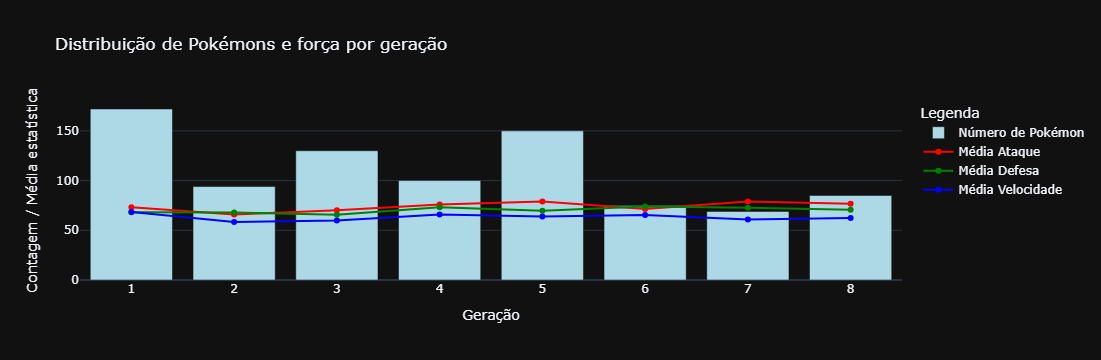

In [37]:
#criando um gráfico de barras para o número de Pokémon por geração
bar_trace = go.Bar(
    x=gen_counts.index,
    y=gen_counts.values,
    name='Número de Pokémon',
    marker=dict(color='lightblue')
)

#criando gráficos de linhas para as estatísticas médias por geração
#média de ataque
line_trace_attack = go.Scatter(
    x=gen_means.index,
    y=gen_means['attack'],
    mode='lines+markers',
    name='Média Ataque',
    line=dict(color='red')
)
#média de defesa
line_trace_defense = go.Scatter(
    x=gen_means.index,
    y=gen_means['defense'],
    mode='lines+markers',
    name='Média Defesa',
    line=dict(color='green')
)
#média de velocidade
line_trace_speed = go.Scatter(
    x=gen_means.index,
    y=gen_means['speed'],
    mode='lines+markers',
    name='Média Velocidade',
    line=dict(color='blue')
)

#combinando todos gráficos em um só
fig = go.Figure(data=[bar_trace, line_trace_attack, line_trace_defense, line_trace_speed])

#criando o gráfico de barras como o número de pokemons por geração e com linhas contendo as médias de ataque, defesa e velocidade.
fig.update_layout(
    title='Distribuição de Pokémons e força por geração',
    xaxis_title='Geração',
    yaxis_title='Contagem / Média estatística',
    barmode='overlay',
    template='plotly_dark',
    legend=dict(title='Legenda')
)

fig.show()

### Resposta
Em resumo, não há grandes mudanças nos atributos de força dos Pokémon entre as gerações. A estabilidade dos atributos sugere que o balanceamento estratégico é uma prioridade para os desenvolvedores, enquanto a variação na quantidade de Pokémon indica um ajuste cuidadoso às fases de inovação e renovação da franquia.

## Distribuição dos Atributos 'Attack', 'Defense' e 'Speed' por Tipo de Pokémon ('type_1'):

* Utilize um boxplot para visualizar a distribuição de 'attack', 'defense' e 'speed' para cada tipo de Pokémon. Considere criar gráficos separados para cada
atributo.

* Quais tipos tendem a ter os maiores ou menores valores de 'attack', 'defense' e 'speed'?

* Existe algum tipo que é notavelmente equilibrado ou forte em algum atributo?




## Seleção de Pokémon para a Bolsa:
* Simule a situação na qual você receberá 3 Pokémon de 10 tipos diferentes, selecionados
aleatoriamente.
* Desses 30 Pokémon, você deve automatizar a seleção de 6 Pokémon
para a sua bolsa com base em um critério otimizado.
* Para isso, utilize uma métrica ponderada que leve em consideração os atributos attack,
defense, speed e as colunas de against, aplicando pesos customizados para cada
critério. Além disso, a equipe final deve conter tipos variados, sem repetição de tipos.
* Crie um gráfico de dispersão 3D para visualizar attack, defense e speed dos Pokémon selecionados.
* Justifique a seleção dos 6 Pokémon, explicando como os critérios otimizados ajudaram a
montar uma equipe equilibrada.
* Discuta os trade-offs entre atributos ofensivos e defensivos, além das resistências e
fraquezas de cada Pokémon contra outros tipos.
* A sua equipe final é equilibrada ou focada em certos atributos? Explique como sua
análise influenciou essa decisão estratégica

## Análise de Forças e Fraquezas:
* Depois de selecionar os 6 Pokémon, analise detalhadamente suas forças e fraquezas.
* Utilize as colunas de ‘against’ para calcular um índice de força total para cada Pokémon
contra todos os outros tipos e produza um gráfico radar (spider plot) para cada um dos 6 Pokémon. Além disso, crie uma matriz de calor (heatmap) que mostre as fraquezas mais críticas da sua equipe.
* Analise as vulnerabilidades e vantagens da sua equipe em potencial. Explique se a equipe é bem balanceada contra adversários ou se possui fraquezas notáveis. Como isso afeta suas chances em uma batalha hipotética?